In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
sns.set_style('darkgrid')

In [3]:
### PRFDR ###
edge_data = pd.read_csv('ANLSYS2/STROMAL/edge_ordrs.csv')
gap_data = pd.read_csv('ANLSYS2/STROMAL/gap_ordrs.csv')

In [4]:
print(edge_data)
print(gap_data)

       Unnamed: 0  time  center     order type  iter
0               0     0       0  0.000000   ER     0
1               1     0       1  4.610537   ER     0
2               2     0       2  2.283286   ER     0
3               3     0       3  0.931137   ER     0
4               4     0       4  0.000000   ER     0
...           ...   ...     ...       ...  ...   ...
35815       35815   198       5  4.260349   GM     0
35816       35816   198       6  3.006271   GM     0
35817       35817   198       7  0.311594   GM     0
35818       35818   198       8  0.000000   GM     0
35819       35819   198       9  1.235935   GM     0

[35820 rows x 6 columns]
       Unnamed: 0  time  center      order type  iter
0               0     0       0  10.492035   ER     0
1               1     0       1   4.610537   ER     0
2               2     0       2   8.847196   ER     0
3               3     0       3   2.406137   ER     0
4               4     0       4   9.953792   ER     0
...           

(-10, 30)

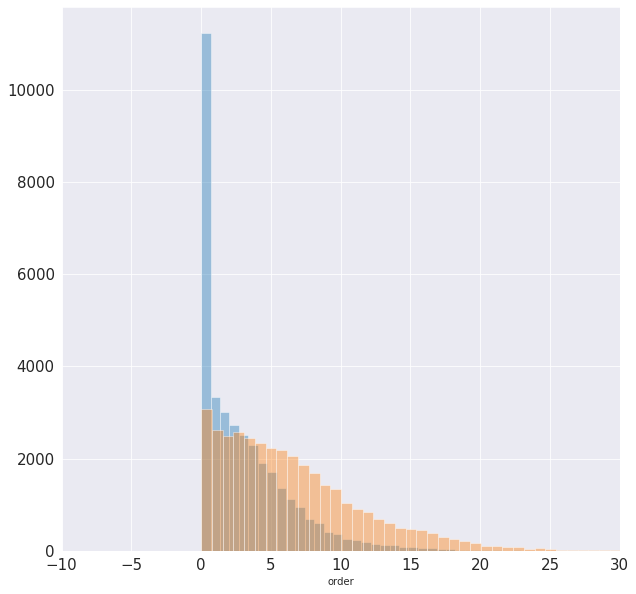

In [5]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1, 1, 1)
sns.distplot(edge_data.order,ax = ax,kde = False)
sns.distplot(gap_data.order,ax = ax,kde = False)
ax.set_xlim(-10,30)

In [6]:
gap_series = pd.Series(['Gap']*35820)
edge_series = pd.Series(['Edge']*35820)
#type_series = pd.concat(gap_series,edge_series)
type_series = gap_series.append(edge_series)
order_series = gap_data.order.append(edge_data.order)
order_df = pd.DataFrame({'Order':order_series,'Categorie': type_series})

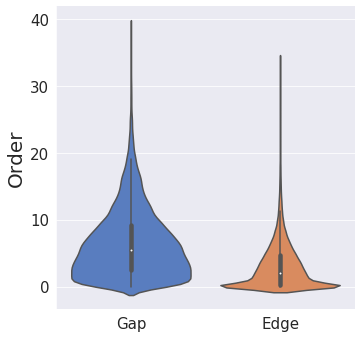

In [7]:
sns.catplot(x="Categorie", y="Order", #, hue="Categorie",inner = 'quartile
            kind="violin", data=order_df,scale = 'count',palette="muted")
plt.ylabel('Order',fontsize = 20)
plt.xlabel(None)
plt.show()


In [8]:
order_df[order_df.Categorie == 'Edge'].count()

Order        35820
Categorie    35820
dtype: int64

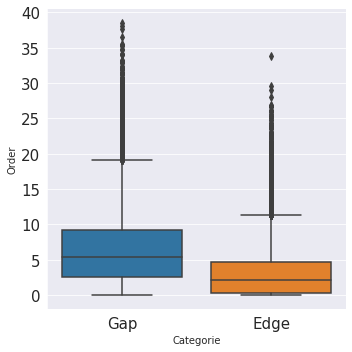

In [9]:
sns.catplot(x="Categorie", y="Order",data=order_df, kind="box");

In [10]:
# sns.catplot(x="Categorie", y="Order",data=order_df, kind="swarm");

In [11]:
# sns.catplot(x="Categorie", y="Order",data=order_df, kind="swarm",size = 1);

In [12]:
from scipy.stats import ttest_rel
stats = ttest_rel(edge_data.order,gap_data.order)
print(stats)
print('The p-value is .006086.')


Ttest_relResult(statistic=-104.62091805053934, pvalue=0.0)
The p-value is .006086.


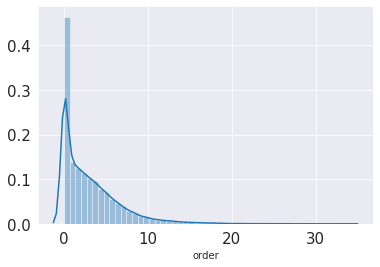

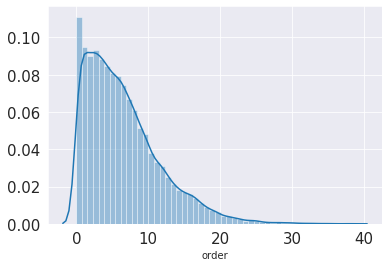

In [13]:
sns.distplot(edge_data.order)
plt.show()
sns.distplot(gap_data.order)

In [14]:
print(np.mean(edge_data.order))
print(np.mean(gap_data.order))

3.0730904802052375
6.497013655491276
